"""

@Author: Samarth BM

@Date: 2021-11-18

@Last Modified by: Samarth BM

@Title : Program to insert a cpu log data.csv file from hdfs into hive database using pyhive library,and perform different query and also do visualization of the result.

"""

In [1]:
from pyhive import hive
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
load_dotenv(".env")

True

In [2]:
host_name = os.getenv("HOST_NAME")
port = os.getenv("PORT")
user = os.getenv("USER")


Creating database.

In [3]:
try:
        connection = hive.Connection(host=host_name, port=port)

        cur = connection.cursor()
        cur.execute("CREATE DATABASE {}".format("CpuLogData"))
        print("Database created successfully")

except Exception as e:
    print(e)

Database created successfully


Creating table.

In [4]:
try:
        connection = hive.Connection(host=host_name, port=port, username=user,database="CpuLogData")

        cur = connection.cursor()
        cur.execute("create table data(DateTime date,c1 string,c2 string,c3 string,c4 string,c5 string,c6 string,c7 string,c8 string,c9 string,c10 string,c11 string,c12 string,c13 string,c14 string,c15 string,c16 string,c17 string,c18 string,c19 string,c20 string,c21 string,c22 string,c23 string,c24 string,c25 string,c26 string,c27 string,c28 string,c29 string,c30 string,c31 string,c32 string,c33 string,c34 string,c35 string,c36 string,c37 string,c38 string,c39 string,user_name string,keyboard string,mouse string,c44 string,c45 string) row format delimited fields terminated by ',' stored as textfile location 'hdfs://localhost:9000/CpuLogCSVFiles' tblproperties('skip.header.line.count'='1')")
        print("Table created successfully")

except Exception as e:
    print(e)

Table created successfully


To get the user counts who are working.

In [5]:
try:
    conn = hive.Connection(host=host_name,port=port,database='CpuLogData')
    user_working_count = pd.read_sql("select user_name ,count('') as total from data where keyboard !=0 or mouse!=0 group by user_name",conn)
    print(user_working_count)
except Exception as e:
    print(e)

                      user_name  total
0  bhagyashrichalke21@gmail.com    361
1         damodharn21@gmail.com    191
2       deepshukla292@gmail.com    475
3            iamnzm@outlook.com    459
4     markfernandes66@gmail.com    389
5         rahilstar11@gmail.com    399
6      salinabodale73@gmail.com    440
7         sharlawar77@gmail.com    457


Plotting bar graph for above data.

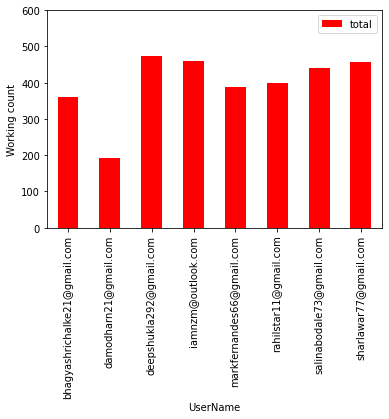

In [6]:
try:
    #pdf=user_working_count.toPandas()
    user_working_count.plot.bar(x='user_name', y='total',color = 'r')
    plt.ylim(0,600)
    plt.xlabel("UserName")
    plt.ylabel("Working count")
    plt.show()
except Exception as e:
    print(e)

Getting average working seconds of each user.

In [7]:
avg_work_sec=pd.read_sql("select user_name,((((count(''))*5)*60)/6) as average_working_sec from data where keyboard!=0 or mouse!=0 group by user_name",conn)
print(avg_work_sec)

                      user_name  average_working_sec
0  bhagyashrichalke21@gmail.com              18050.0
1         damodharn21@gmail.com               9550.0
2       deepshukla292@gmail.com              23750.0
3            iamnzm@outlook.com              22950.0
4     markfernandes66@gmail.com              19450.0
5         rahilstar11@gmail.com              19950.0
6      salinabodale73@gmail.com              22000.0
7         sharlawar77@gmail.com              22850.0


Coverting average work seconds to average hour and getting highest,lowest average working hour.

In [8]:
average_work_hour = avg_work_sec[["user_name","average_working_sec"]]
average_work_hour["average_working_sec"]= pd.to_datetime(average_work_hour['average_working_sec'] ,unit='s').dt.strftime("%H:%M")
average_work_hour.rename(columns={'average_working_sec': 'average_working_hour'}, inplace=True)
print(average_work_hour,"\n")

print("Highest average working hour")
highest_average_work_hour=average_work_hour.max()
print(highest_average_work_hour,"\n")

print("Lowest average working hour")
lowest_average_work_hour=average_work_hour.min()
print(lowest_average_work_hour)

                      user_name average_working_hour
0  bhagyashrichalke21@gmail.com                05:00
1         damodharn21@gmail.com                02:39
2       deepshukla292@gmail.com                06:35
3            iamnzm@outlook.com                06:22
4     markfernandes66@gmail.com                05:24
5         rahilstar11@gmail.com                05:32
6      salinabodale73@gmail.com                06:06
7         sharlawar77@gmail.com                06:20 

Highest average working hour
user_name               sharlawar77@gmail.com
average_working_hour                    06:35
dtype: object 

Lowest average working hour
user_name               bhagyashrichalke21@gmail.com
average_working_hour                           02:39
dtype: object


Barplot for above data.

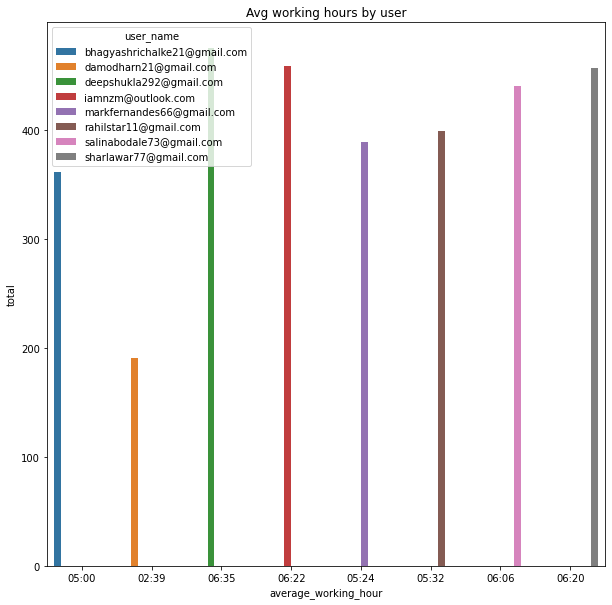

In [9]:
total = user_working_count['total']
plt.figure(figsize = (10,10))
sns.barplot(x = 'average_working_hour',y=total,data = average_work_hour,hue='user_name')
plt.title("Avg working hours by user")
plt.show()

Getting counts of users sitting idle.

In [10]:
try:
    conn = hive.Connection(host=host_name,port=port,database='CpuLogData')
    user_idle_count = pd.read_sql("select user_name ,count('') as total from data where keyboard =0 or mouse=0 group by user_name",conn)
    print(user_idle_count)
except Exception as e:
    print(e)

                      user_name  total
0  bhagyashrichalke21@gmail.com    159
1         damodharn21@gmail.com    100
2       deepshukla292@gmail.com    256
3            iamnzm@outlook.com    259
4     markfernandes66@gmail.com    235
5         rahilstar11@gmail.com    256
6      salinabodale73@gmail.com    239
7         sharlawar77@gmail.com    178


Getting average idle seconds of all users.

In [11]:
avg_idle_sec=pd.read_sql("select user_name,((((count(''))*5)*60)/6) as average_idle_sec from data where keyboard=0 or mouse=0 group by user_name",conn)
print(avg_idle_sec)

                      user_name  average_idle_sec
0  bhagyashrichalke21@gmail.com            7950.0
1         damodharn21@gmail.com            5000.0
2       deepshukla292@gmail.com           12800.0
3            iamnzm@outlook.com           12950.0
4     markfernandes66@gmail.com           11750.0
5         rahilstar11@gmail.com           12800.0
6      salinabodale73@gmail.com           11950.0
7         sharlawar77@gmail.com            8900.0


Converting average idle seconds to average idle hours and finding the highest,lowest avg idle hrs.

In [12]:
average_idle_hour = avg_idle_sec[["user_name","average_idle_sec"]]
average_idle_hour["average_idle_sec"]= pd.to_datetime(average_idle_hour['average_idle_sec'] ,unit='s').dt.strftime("%H:%M")
average_idle_hour.rename(columns={'average_idle_sec': 'average_idle_hour'}, inplace=True)
print(average_idle_hour,"\n")

print("Highest average idle hour")
highest_average_idle_hour=average_idle_hour.max()
print(highest_average_idle_hour,"\n")

print("Lowest average idle hour")
lowest_average_idle_hour=average_idle_hour.min()
print(lowest_average_idle_hour)

                      user_name average_idle_hour
0  bhagyashrichalke21@gmail.com             02:12
1         damodharn21@gmail.com             01:23
2       deepshukla292@gmail.com             03:33
3            iamnzm@outlook.com             03:35
4     markfernandes66@gmail.com             03:15
5         rahilstar11@gmail.com             03:33
6      salinabodale73@gmail.com             03:19
7         sharlawar77@gmail.com             02:28 

Highest average idle hour
user_name            sharlawar77@gmail.com
average_idle_hour                    03:35
dtype: object 

Lowest average idle hour
user_name            bhagyashrichalke21@gmail.com
average_idle_hour                           01:23
dtype: object


Bar plot for above data.

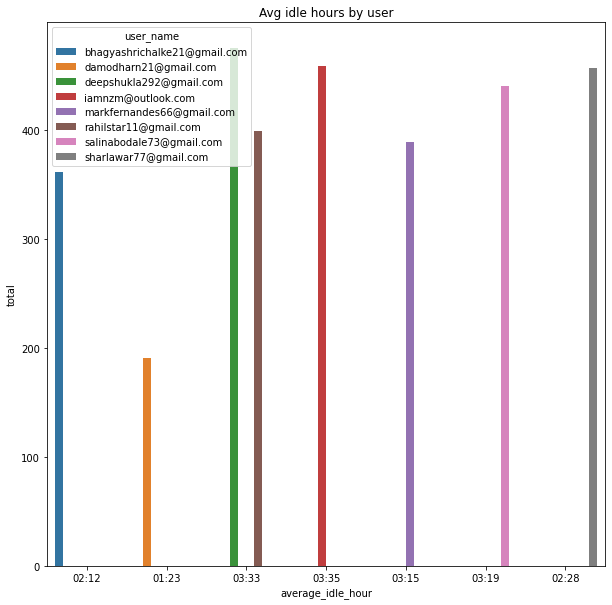

In [13]:
total = user_working_count['total']
plt.figure(figsize = (10,10))
sns.barplot(x = 'average_idle_hour',y=total,data = average_idle_hour,hue='user_name')
plt.title("Avg idle hours by user")
plt.show()